# Data Cleaning

## Objectives

* Evaluate the missing data
* Clean the data
  
## Inputs

* Dataset: `outputs/datasets/collection/house_prices_records.csv`

## Outputs

* Generate a fully cleaned set for study, and cleaned Train and Test set, both saved under `outputs/datasets/cleaned`

# Conclusions

* TBD

---

# Change working directory

The notebooks for this project are stored in a subfolder called `jupyter_notebooks`, therefore when running the notebook, the working directory needs to be changed to the parent folder. 
* We access the current directory with `os.getcwd()`

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/pp5-house-price-predictor/jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory of: ", os.getcwd())

You set a new current directory of:  /workspace/pp5-house-price-predictor


---

# Load Collected Data

In [3]:
import pandas as pd
df_raw_path = "outputs/datasets/collection/house_prices_records.csv"
df = pd.read_csv(df_raw_path)
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,...,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,...,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,...,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,...,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,...,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,...,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


---

# Data Exploration

We will check the distribution and shape of the variables with missing data. Also added a comparison of variables without missing data to review differences in data types. 

In [4]:
vars_with_missing_data = df.columns[df.isna().sum() > 0].to_list()
vars_with_missing_data

['2ndFlrSF',
 'BedroomAbvGr',
 'BsmtFinType1',
 'EnclosedPorch',
 'GarageFinish',
 'GarageYrBlt',
 'LotFrontage',
 'MasVnrArea',
 'WoodDeckSF']

In [5]:
vars_without_missing_data = df.columns[df.isna().sum() == 0].to_list()
vars_without_missing_data

['1stFlrSF',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'GarageArea',
 'GrLivArea',
 'KitchenQual',
 'LotArea',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'TotalBsmtSF',
 'YearBuilt',
 'YearRemodAdd',
 'SalePrice']

In [6]:
df[vars_with_missing_data].isna().sum()

2ndFlrSF           86
BedroomAbvGr       99
BsmtFinType1      114
EnclosedPorch    1324
GarageFinish      162
GarageYrBlt        81
LotFrontage       259
MasVnrArea          8
WoodDeckSF       1305
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1460 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1346 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1298 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  OverallQ

In [8]:
df[vars_with_missing_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   2ndFlrSF       1374 non-null   float64
 1   BedroomAbvGr   1361 non-null   float64
 2   BsmtFinType1   1346 non-null   object 
 3   EnclosedPorch  136 non-null    float64
 4   GarageFinish   1298 non-null   object 
 5   GarageYrBlt    1379 non-null   float64
 6   LotFrontage    1201 non-null   float64
 7   MasVnrArea     1452 non-null   float64
 8   WoodDeckSF     155 non-null    float64
dtypes: float64(7), object(2)
memory usage: 102.8+ KB


In [9]:
df[vars_without_missing_data].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   1stFlrSF      1460 non-null   int64 
 1   BsmtExposure  1460 non-null   object
 2   BsmtFinSF1    1460 non-null   int64 
 3   BsmtUnfSF     1460 non-null   int64 
 4   GarageArea    1460 non-null   int64 
 5   GrLivArea     1460 non-null   int64 
 6   KitchenQual   1460 non-null   object
 7   LotArea       1460 non-null   int64 
 8   OpenPorchSF   1460 non-null   int64 
 9   OverallCond   1460 non-null   int64 
 10  OverallQual   1460 non-null   int64 
 11  TotalBsmtSF   1460 non-null   int64 
 12  YearBuilt     1460 non-null   int64 
 13  YearRemodAdd  1460 non-null   int64 
 14  SalePrice     1460 non-null   int64 
dtypes: int64(13), object(2)
memory usage: 171.2+ KB


* Noticed that the data types with missing data are either float or object, and the data types without missing data are int or object. This is potentially due to the nature in which NaN is recorded as a float64 type. We can review these inconsistencies at the end of the data cleaning process, as you can assume all values of square feet are recorded as whole integers and not as decimal numbers. This can address the performance and consistency point referred to at the end of `1_Data_Collection.ipynb`

In [10]:
from ydata_profiling import ProfileReport
if vars_with_missing_data:
    profile = ProfileReport(df=df[vars_with_missing_data], minimal=True)
    profile.to_notebook_iframe()
else:
    print("There are no variables with missing data")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Initial Review**
* 2ndFlrSF missing 5.9% of values, numeric, 53.5% zero's, min=0 : max=2065
* BedroomAbvGr missing 6.8% of values, numeric, 0.4% zero's, min=0 : max=8 (why are there zeros for bedrooms?)
* BsmtFinType1 missing 7.8% of values, categorical (7 categories), none=31 instances : unf=396 instances
* EnclosedPorch missing 90.7% of values, numeric, 7.9% zero's, min=0 : max=286, (consider dropping?)
* GarageFinish missing 11.1% of values, categorical (4 categories), none=73 (5.6%) instances : unf=546 (42.1%) instances
* GarageYrBlt missing 5.5% of values, numeric, 0.0% zero's, min=1900 : max=2010
* LotFrontage missing 17.7% of values, numeric, 0.0% zero's, min=21 : max=313
* MasVnrArea missing 0.5% of values, numeric, 59.0% zero's, min=0 : max=1600
* WoodDeckSF missing 89.4% of values, numeric, 5.3% zero's, min=0 : max=736 (consider dropping?)

# Correlation and PPS Analysis

* We run a correlation and PPS Analysis to help guide the data cleaning steps further in the workflow. Allowing us to determine the impact missing data affects the relationships between variables, and to help direct which variables need closer attention when performing imputation in the data cleaning process. 

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ppscore as pps


def heatmap_corr(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True
        mask[abs(df) < threshold] = True

        fig, axes = plt.subplots(figsize=figsize)
        sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                    mask=mask, cmap='viridis', annot_kws={"size": font_annot}, ax=axes,
                    linewidth=0.5
                    )
        axes.set_yticklabels(df.columns, rotation=0)
        plt.ylim(len(df.columns), 0)
        plt.show()


def heatmap_pps(df, threshold, figsize=(20, 12), font_annot=8):
    if len(df.columns) > 1:
        mask = np.zeros_like(df, dtype=np.bool)
        mask[abs(df) < threshold] = True
        fig, ax = plt.subplots(figsize=figsize)
        ax = sns.heatmap(df, annot=True, xticklabels=True, yticklabels=True,
                         mask=mask, cmap='rocket_r', annot_kws={"size": font_annot},
                         linewidth=0.05, linecolor='grey')
        plt.ylim(len(df.columns), 0)
        plt.show()


def CalculateCorrAndPPS(df):
    df_corr_spearman = df.corr(method="spearman")
    df_corr_pearson = df.corr(method="pearson")

    pps_matrix_raw = pps.matrix(df)
    pps_matrix = pps_matrix_raw.filter(['x', 'y', 'ppscore']).pivot(columns='x', index='y', values='ppscore')

    pps_score_stats = pps_matrix_raw.query("ppscore < 1").filter(['ppscore']).describe().T
    print("PPS threshold - check PPS score IQR to decide threshold for heatmap \n")
    print(pps_score_stats.round(3))

    return df_corr_pearson, df_corr_spearman, pps_matrix


def DisplayCorrAndPPS(df_corr_pearson, df_corr_spearman, pps_matrix, CorrThreshold, PPS_Threshold,
                      figsize=(20, 12), font_annot=8):

    print("\n")
    print("* Analyse how the target variable for your ML models are correlated with other variables (features and target)")
    print("* Analyse multi-colinearity, that is, how the features are correlated among themselves")

    print("\n")
    print("*** Heatmap: Spearman Correlation ***")
    print("It evaluates monotonic relationship \n")
    heatmap_corr(df=df_corr_spearman, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Pearson Correlation ***")
    print("It evaluates the linear relationship between two continuous variables \n")
    heatmap_corr(df=df_corr_pearson, threshold=CorrThreshold, figsize=figsize, font_annot=font_annot)

    print("\n")
    print("*** Heatmap: Power Predictive Score (PPS) ***")
    print(f"PPS detects linear or non-linear relationships between two columns.\n"
          f"The score ranges from 0 (no predictive power) to 1 (perfect predictive power) \n")
    heatmap_pps(df=pps_matrix, threshold=PPS_Threshold, figsize=figsize, font_annot=font_annot)

Calculate Correlations and Power Predictive Score

In [12]:
df_corr_pearson, df_corr_spearman, pps_matrix = CalculateCorrAndPPS(df)

/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspace/.pip-modules/lib/python3.8/site-packages/sklearn/model_selection/_split.py:666: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"
/workspa

PPS threshold - check PPS score IQR to decide threshold for heatmap 

         count   mean    std  min  25%  50%    75%    max
ppscore  552.0  0.055  0.104  0.0  0.0  0.0  0.066  0.702


* As this review is conducted on unclean data, it was expected that there would be some warnings which have indicated there are potentially some imbalance in the data. This will be picked up during the comprehesive cleaning process and re-assessed. 



* Analyse how the target variable for your ML models are correlated with other variables (features and target)
* Analyse multi-colinearity, that is, how the features are correlated among themselves


*** Heatmap: Spearman Correlation ***
It evaluates monotonic relationship 



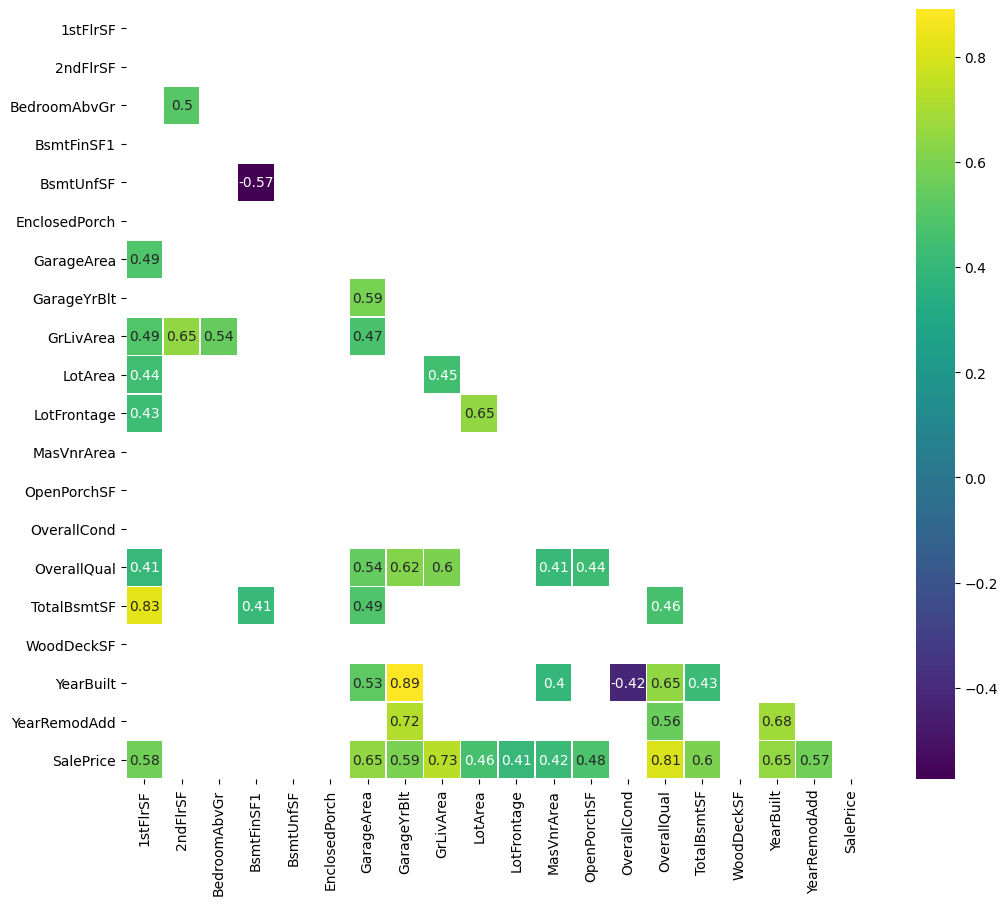



*** Heatmap: Pearson Correlation ***
It evaluates the linear relationship between two continuous variables 



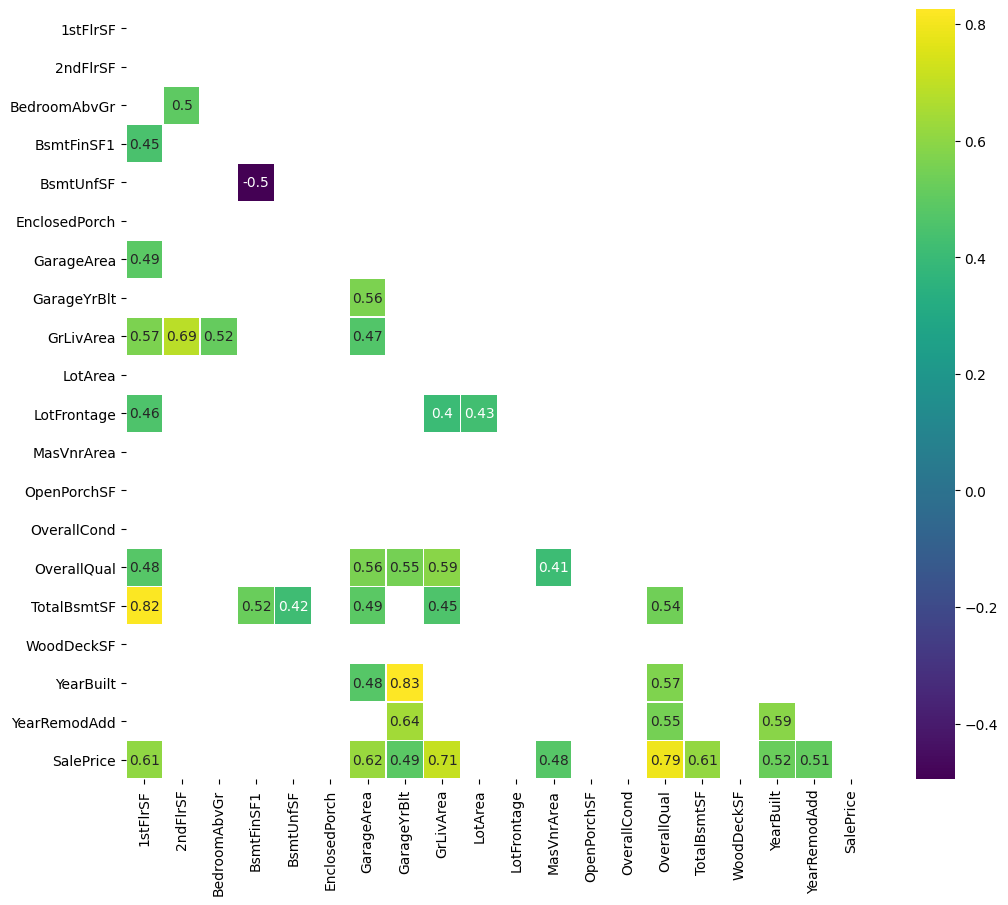



*** Heatmap: Power Predictive Score (PPS) ***
PPS detects linear or non-linear relationships between two columns.
The score ranges from 0 (no predictive power) to 1 (perfect predictive power) 



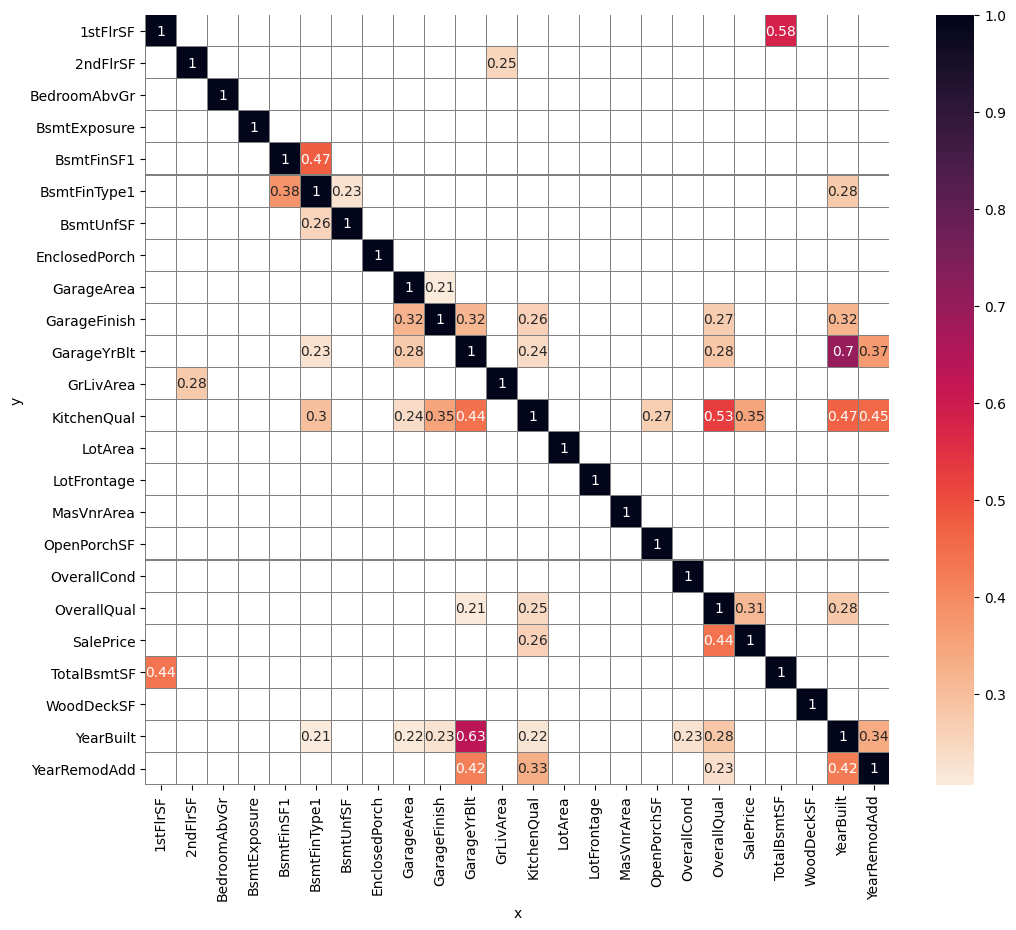

In [13]:
DisplayCorrAndPPS(df_corr_pearson = df_corr_pearson,
                  df_corr_spearman = df_corr_spearman, 
                  pps_matrix = pps_matrix,
                  CorrThreshold = 0.4, PPS_Threshold =0.2,
                  figsize=(12,10), font_annot=10)

**Initial Findings**

* Spearman correlation:
  * Very Strong Correlation (0.7 - 1.0)
    * Features vs SalePrice
      * highlights that there is very strong correlation between `OverallQual` and `GrLivArea` vs `SalePrice`
    * Multi-colinearity
      * highlights that there is very strong multi-colinearity between `YearBuilt` and `GarageYrBlt`
  * highlights that there is very strong multi-colinearity between `TotalBsmtSF` and `1stFlrSF`
  * Strong Correlation (0.5 - 0.7) - *summarised for anything > 0.6
    * Features vs SalePrice
      * highlights that there is strong correlation between `1stFlrSF`, `GarageArea`, `GarageYrBlt`, `TotalBsmtSF`, `YearBuilt` and `YearRemodAdd`
    * Multi-colinearity
      * highlights that there is strong multi-colinearity between `GrLivArea` and `2ndFlrSF`
      * highlights that there is strong multi-colinearity between `OverallQual` and `GarageYrBlt`
      * highlights that there is strong multi-colinearity between `OverallQual` and `GrLivArea`
      * highlights that there is strong multi-colinearity between `OverallQual` and `YearBuilt`
      * highlights that there is strong multi-colinearity between `YearBuilt` and `YearRemodAdd`
* Pearson correlation:
  * Very Strong Correlation (0.7 - 1.0)
    * Features vs SalePrice
      * highlights that there is very strong correlation between `OverallQual` and `GrLivArea` vs `SalePrice`
    * Multi-colinearity
      * highlights that there is very strong multi-colinearity between `YearBuilt` and `GarageYrBlt`
      * highlights that there is very strong multi-colinearity between `TotalBsmtSF` and `1stFlrSF`
  * Strong Correlation (0.5 - 0.7) - *summarised for anything > 0.6
    * Features vs SalePrice
      * highlights that there is strong correlation between `1stFlrSF`, `GarageArea`, `GarageYrBlt`, `TotalBsmtSF`, `YearBuilt` and `YearRemodAdd`
    * Multi-colinearity
      * highlights that there is strong multi-colinearity between `GrLivArea` and `2ndFlrSF`
* Power Predictive Score
  * `GarageYrBlt` indicates it is a strong predictor of `YearBuilt` with a PPS of 0.70
  * `YearBuilt` indicates it is a moderate predictor of `GarageYrBlt` with with a PPS of 0.63
  * `OverallQual` indicates it is a moderate predictor of `KitchenQual` of with a PPS of 0.53

# Data Cleaning

### Assessing Missing Data Levels

* Custom function to display missing data levels in a DataFrame, it shows the absolute levels, relative levels and data type.

In [18]:
def EvaluateMissingData(df):
    missing_data_absolute = df.isnull().sum()
    missing_data_percentage = round(missing_data_absolute/len(df)*100, 2)
    df_missing_data = (pd.DataFrame(
                            data={"RowsWithMissingData": missing_data_absolute,
                                   "PercentageOfDataset": missing_data_percentage,
                                   "DataType": df.dtypes}
                                    )
                          .sort_values(by=['PercentageOfDataset'], ascending=False)
                          .query("PercentageOfDataset > 0")
                          )

    return df_missing_data

Check missing data levels for the collected dataset.

In [19]:
EvaluateMissingData(df)

,RowsWithMissingData,PercentageOfDataset,DataType
EnclosedPorch,1324,90.68,float64
WoodDeckSF,1305,89.38,float64
LotFrontage,259,17.74,float64
GarageFinish,162,11.10,object
BsmtFinType1,114,7.81,object
BedroomAbvGr,99,6.78,float64
2ndFlrSF,86,5.89,float64
GarageYrBlt,81,5.55,float64
MasVnrArea,8,0.55,float64


There are two variables in consideration for dropping, due to high levels of missing data. Those being `EnclosedPorch` & `WoodDeckSF`. They are unlikely to give any reliable information by trying to impute the missing values. 
